In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
import sklearn
import os
import xgboost as xgb
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [82]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))
pi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_pi.csv',header= None))
dpi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_dpi.csv',header= None))
V = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_V.csv',header = None))
df_pions = np.hstack((pi,dpi,V))
#np.random.shuffle(df_pions)
train_x, train_y = df_pions[:-1000,:-1],(-df_pions[:-1000,-1])
val_x, val_y = df_pions[-1000:,:-1], (-df_pions[-1000:,-1]) 


In [124]:
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=1, colsample_bytree=0.8,gpu_id = '0')
model.set_params(eval_metric = 'mape', min_child_weight = 150)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.8,
             enable_categorical=False, eta=0.1, eval_metric='mape', gamma=None,
             gpu_id='0', importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=7,
             min_child_weight=150, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=1, tree_method=None,
             validate_parameters=None, verbosity=None)

In [125]:
history = model.fit(train_x,train_y,eval_set=[(train_x,train_y),(val_x,val_y)], verbose= True)

[0]	validation_0-mape:3.25656	validation_1-mape:3.08272
[1]	validation_0-mape:2.99228	validation_1-mape:2.83019
[2]	validation_0-mape:2.75440	validation_1-mape:2.60434
[3]	validation_0-mape:2.54115	validation_1-mape:2.40289
[4]	validation_0-mape:2.34759	validation_1-mape:2.21711
[5]	validation_0-mape:2.17171	validation_1-mape:2.04972
[6]	validation_0-mape:2.01331	validation_1-mape:1.89916
[7]	validation_0-mape:1.87404	validation_1-mape:1.76585
[8]	validation_0-mape:1.74738	validation_1-mape:1.64362
[9]	validation_0-mape:1.63443	validation_1-mape:1.53565
[10]	validation_0-mape:1.53117	validation_1-mape:1.43615
[11]	validation_0-mape:1.43728	validation_1-mape:1.34761
[12]	validation_0-mape:1.35444	validation_1-mape:1.26901
[13]	validation_0-mape:1.27933	validation_1-mape:1.19762
[14]	validation_0-mape:1.21066	validation_1-mape:1.13348
[15]	validation_0-mape:1.15041	validation_1-mape:1.07505
[16]	validation_0-mape:1.09605	validation_1-mape:1.02419
[17]	validation_0-mape:1.04398	validation

In [126]:
train_loss = pd.DataFrame(history.evals_result()['validation_0'])
val_loss = pd.DataFrame(history.evals_result()['validation_1'])
est = np.arange(1,1001)


Text(0.5, 0, 'Number of Trees')

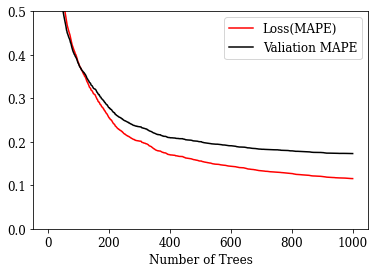

In [129]:
plt.plot(est,train_loss,c = 'red', label = 'Loss(MAPE)')
plt.plot(est,val_loss,c = 'black', label = 'Valiation MAPE')
plt.legend()
plt.ylim(0,.5)
plt.xlabel('Number of Trees')

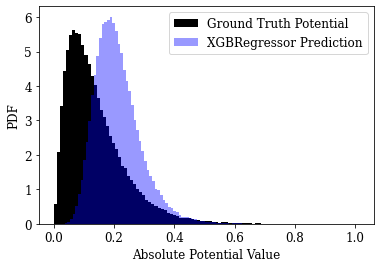

In [128]:
df_pions_test = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data_2.csv',header = None))
result = model.predict(df_pions_test[:,:-1])
plt.hist(abs(df_pions_test[:,-1]),density= True, bins = 100, label = 'Ground Truth Potential', color = 'black')
plt.hist(result, bins = 100, density= True, color = 'blue', label = 'XGBRegressor Prediction', alpha  = 0.4)
plt.xlabel('Absolute Potential Value')
plt.ylabel('PDF')
plt.legend()


In [96]:
mean = []
chunk = 100
test_V = (-df_pions_test[:,-1])**0.25
chunk_size  = len(result)//chunk
for i in range(chunk):
    mean.append(np.mean(abs(np.array((result+test_V)/test_V))[chunk_size*i:chunk_size*(i+1)]))
mean = np.array(mean)
std = np.std(mean)
mean = np.mean(mean)
print('mean is = ', mean, 'STD is = ', std)

mean is =  1.3407607039925002 STD is =  0.004306119339937294
